In [16]:
import seaborn as sns
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [1]:
stc_1 = 'Time flies like an arrow'
stc_2 = 'Fruit flies like a banana'

In [6]:
corpus = [stc_1, stc_2]
one_hot_vect = CountVectorizer(binary=True)
one_hot = one_hot_vect.fit_transform(corpus).toarray()
vocab = one_hot_vect.get_feature_names_out()

<AxesSubplot:>

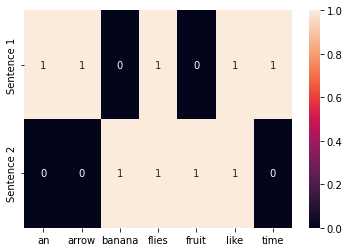

In [7]:
sns.heatmap(one_hot, annot=True, xticklabels=vocab, yticklabels=['Sentence 1', 'Sentence 2'])

In [9]:
corpus = [stc_1, stc_2]
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(corpus).toarray()
vocab = tfidf_vect.get_feature_names_out()

<AxesSubplot:>

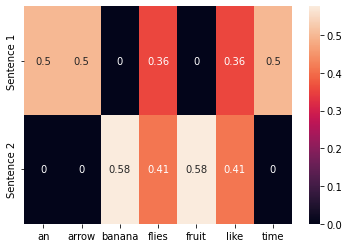

In [10]:
sns.heatmap(tfidf, annot=True, xticklabels=vocab, yticklabels=['Sentence 1', 'Sentence 2'])

In [11]:
def describe(X):
    print(f'타입: {X.type()}')
    print(f'크기: {X.shape}')
    print(f'값: \n{X}')

In [13]:
describe(torch.Tensor(2, 3))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.0000e+00, 7.0065e-44, 1.8754e+28],
        [2.0592e+23, 1.3613e-05, 1.0026e-11]])


In [14]:
describe(torch.rand(2, 3)), describe(torch.randn(2, 3))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.8782, 0.2122, 0.2869],
        [0.8188, 0.8271, 0.9577]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 1.3197, -0.1745,  0.9404],
        [ 0.7009,  1.5436, -0.6243]])


(None, None)

In [15]:
describe(torch.zeros(2, 3)), describe(torch.ones(2, 3)), describe(torch.ones(2, 3).fill_(5))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])


(None, None, None)

In [19]:
npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))

타입: torch.DoubleTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.0936, 0.3820, 0.7132],
        [0.2686, 0.1020, 0.8131]], dtype=torch.float64)


In [20]:
x = torch.FloatTensor([[1, 2, 3],
                       [4, 5, 6]])
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [23]:
x = x.long()
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [25]:
x = torch.tensor([[1, 2, 3],
                [4, 5, 6]], dtype=torch.int64)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [26]:
x = x.float()
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [28]:
x = torch.randn(2, 3)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 0.5319, -0.3188, -0.6483],
        [ 0.1821,  0.3716, -0.5279]])


In [30]:
describe(torch.add(x, x)), describe(x + x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 1.0638, -0.6376, -1.2966],
        [ 0.3643,  0.7433, -1.0558]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 1.0638, -0.6376, -1.2966],
        [ 0.3643,  0.7433, -1.0558]])


(None, None)

In [31]:
x = torch.arange(6)
describe(x)

타입: torch.LongTensor
크기: torch.Size([6])
값: 
tensor([0, 1, 2, 3, 4, 5])


In [32]:
x = x.reshape(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [34]:
describe(torch.sum(x, dim=0)), describe(torch.sum(x, dim=-1))

타입: torch.LongTensor
크기: torch.Size([3])
값: 
tensor([3, 5, 7])
타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([ 3, 12])


(None, None)

In [37]:
describe(torch.transpose(x, 0, 1)), describe(x.T)

타입: torch.LongTensor
크기: torch.Size([3, 2])
값: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])
타입: torch.LongTensor
크기: torch.Size([3, 2])
값: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


(None, None)

In [39]:
describe(x[:1, :2])

타입: torch.LongTensor
크기: torch.Size([1, 2])
값: 
tensor([[0, 1]])


In [41]:
indices = torch.LongTensor([0, 2])
describe(torch.index_select(x, dim=1, index=indices))

타입: torch.LongTensor
크기: torch.Size([2, 2])
값: 
tensor([[0, 2],
        [3, 5]])


In [42]:
indices = torch.LongTensor([0, 0])
describe(torch.index_select(x, dim=0, index=indices))

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [0, 1, 2]])


In [49]:
row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0, 1])
describe(x[row_indices, col_indices]), describe(x[row_indices, :]), describe(x[:, col_indices]), describe(x[[0, 1], col_indices])

타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([0, 4])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([2, 2])
값: 
tensor([[0, 1],
        [3, 4]])
타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([0, 4])


(None, None, None, None)

In [53]:
describe(torch.concat([x, x], dim=0)), describe(torch.concat([x, x], dim=1)), describe(torch.stack([x, x]))

타입: torch.LongTensor
크기: torch.Size([4, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([2, 6])
값: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([2, 2, 3])
값: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


(None, None, None)

In [57]:
x1 = torch.arange(6).reshape(2, 3).float()
x2 = torch.ones(3, 2)
x2[:, 1] += 1
describe(x1), describe(x2)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0., 1., 2.],
        [3., 4., 5.]])
타입: torch.FloatTensor
크기: torch.Size([3, 2])
값: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


(None, None)

In [58]:
describe(torch.matmul(x1, x2))

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[ 3.,  6.],
        [12., 24.]])


In [59]:
x = torch.ones(2, 2, requires_grad=True)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [60]:
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [62]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([])
값: 
21.0
False


In [63]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [64]:
x = torch.rand(3, 3).to(device)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([3, 3])
값: 
tensor([[0.0962, 0.6989, 0.9932],
        [0.0200, 0.8135, 0.9661],
        [0.1175, 0.5036, 0.8609]])
